<a href="https://colab.research.google.com/github/RickyMacharm/Cassava/blob/master/cassava.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir -p ~/.kaggle
!cp ../kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('/content/gdrive/My Drive/fastai-v3/cassava/')
#path.mkdir(exist_ok=True)
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/sample_submission_file.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/extraimages'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test')]

In [0]:
!ls  '/content/gdrive/My Drive/fastai-v3/cassava/test/test/' | head -4

ls: cannot access '/content/gdrive/My Drive/fastai-v3/cassava/test/test/': Input/output error


In [0]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3092            True  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11365            True  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4760           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         38           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3254           False  
champs-scalar-coupling                             2019-08-28 23:59:00  Featured           $30,000      

In [0]:
!kaggle competitions download -c cassava-disease -p '/content/gdrive/My Drive/fastai-v3/cassava/'

  0% 0.00/83.8k [00:00<?, ?B/s]
100% 83.8k/83.8k [00:00<00:00, 5.81MB/s]
100% 513M/515M [00:05<00:00, 79.9MB/s]
100% 515M/515M [00:05<00:00, 90.9MB/s]
 99% 769M/777M [00:10<00:00, 78.3MB/s]
100% 777M/777M [00:10<00:00, 74.3MB/s]
 99% 1.03G/1.04G [00:17<00:00, 53.7MB/s]
100% 1.04G/1.04G [00:17<00:00, 64.4MB/s]


In [0]:
path = Path("/content/gdrive/My Drive/fastai-v3/cassava/")
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/sample_submission_file.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train.zip'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/extraimages.zip')]

In [0]:
#Unzip Files
!unzip -q -n '/content/gdrive/My Drive/fastai-v3/cassava'/train.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/train
!unzip -q -n  '/content/gdrive/My Drive/fastai-v3/cassava'/test.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/test
!unzip -q -n '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages.zip -d '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages

In [0]:
#Delete archive
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/train.zip
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/test.zip
!rm '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages.zip
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/sample_submission_file.csv'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/test'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/extraimages')]

In [0]:
df = pd.read_csv(path/'sample_submission_file.csv')
df.head().T

,0,1,2,3,4
Category,cbsd,cmd,cbb,cmd,cbsd
Id,test-img-0.jpg,test-img-1.jpg,test-img-2.jpg,test-img-3.jpg,test-img-4.jpg


In [0]:
!ls '/content/gdrive/My Drive/fastai-v3/cassava'/extraimages/extraimages | head -5 

#not sure how to handle this unclassfied extra images

extra-image-10000.jpg
extra-image-10001.jpg
extra-image-10002.jpg
extra-image-10004.jpg
extra-image-10005.jpg


In [0]:
data =  ImageDataBunch.from_folder(path=path/'train', train='.', valid_pct=.00, test = path/'test',
                                ds_tfms= get_transforms(flip_vert = True), size = 224,bs = 64).normalize(imagenet_stats)
print(data.classes)
print(data.c)

['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']
5


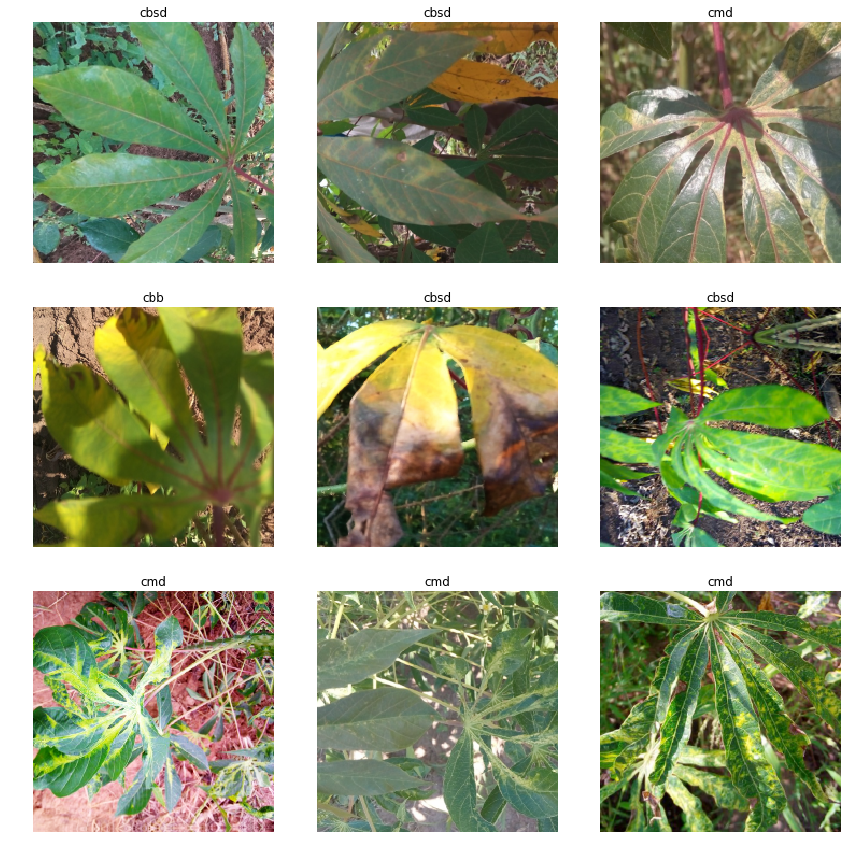

In [0]:
data.show_batch(3)

In [0]:
learnvgg = cnn_learner(data, models.vgg19_bn, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:06<00:00, 84170747.65it/s]


In [0]:
learnvgg.fit_one_cycle(10)

In [0]:
learnvgg.save('stage-1-vgg',True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/stage-1-vgg.pth')

In [0]:
learnvgg.unfreeze()
learnvgg.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.577468,0.701687,0.242070,0.757930,01:29
1,0.554648,0.628126,0.200334,0.799666,01:29
2,0.469476,0.506311,0.173623,0.826377,01:29
3,0.389043,0.463171,0.163606,0.836394,01:32


In [0]:
learnvgg.save('vgg-stage2-thur',True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage2-thur.pth')

In [0]:
learnvgg.lr_find()

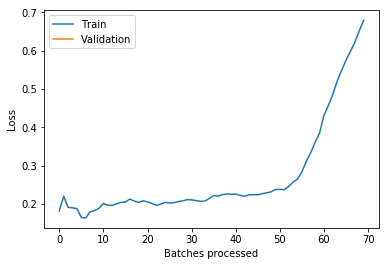

In [0]:
learnvgg.recorder.plot_losses()

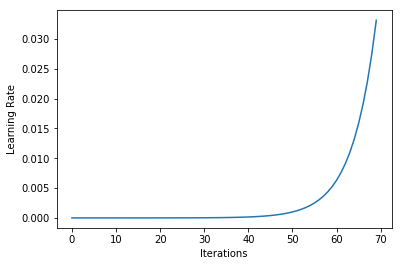

In [0]:
learnvgg.recorder.plot_lr()

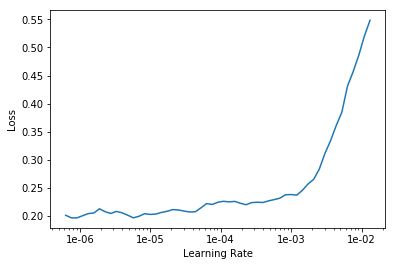

In [0]:
learnvgg.recorder.plot()

In [0]:
learnvgg.save('vgg-stage3-frozen', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage3-frozen.pth')

In [0]:
learnvgg.fit_one_cycle(2,max_lr = slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.207493,0.410079,0.126437,0.873563,02:50
1,0.193376,0.418047,0.122900,0.877100,02:52


In [0]:
# some abracadabra

In [0]:
#Load the last Model before overfitting
learnvgg = cnn_learner(data, models.vgg19_bn, metrics=[error_rate,accuracy])
learnvgg.load("/content/gdrive/My Drive/fastai-v3/cassava/train/models/vgg-stage2-frozen");

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 574769405/574769405 [00:18<00:00, 31358708.27it/s]


RuntimeError: ignored

In [0]:
#Predict and Interprete
preds,y,losses = learnvgg.get_preds(ds_type= DatasetType.Test,with_loss=True)
interp = ClassificationInterpretation(learnvgg, preds, y, losses)

In [0]:
predictions = np.argmax(preds, axis = 1)
predictions[1:10]

tensor([3, 1, 1, 1, 2, 3, 3, 3, 1])

In [0]:
fnames = [f.name[:] for f in learnvgg.data.test_ds.items]
index2labels = {0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}
tempd = pd.DataFrame({'cat':predictions})
tempd['Category'] = tempd['cat'].map(index2labels)
tempd['Id'] = fnames
tempd.drop(['cat'], axis = 1, inplace = True)
tempd.head()

,Category,Id
0,cbsd,test-img-2681.jpg
1,cmd,test-img-2902.jpg
2,cbsd,test-img-2963.jpg
3,cbsd,test-img-2661.jpg
4,cbsd,test-img-2846.jpg


In [0]:

submission_1 = tempd.copy()
submission_1.to_csv('cassava_submission_ovr.csv', index = False)

In [0]:
!kaggle competitions submit -c cassava-disease -f cassava_submission_ovr.csv -m " Submitted Successfully"

100% 81.8k/81.8k [00:01<00:00, 42.6kB/s]
Successfully submitted to Cassava Disease Classification 

### **End of VGG** -- Ignore anything after this

In [0]:
from fastai import *
from fastai.vision import *

In [0]:

learn_res = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 109934155.09it/s]


In [0]:
learn_res.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


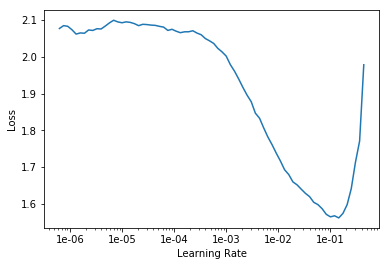

In [0]:

learn_res.recorder.plot()

In [0]:
learn_res.fit_one_cycle(10, max_lr = slice (1e-3,1e-2))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.104648,0.815759,0.287356,0.712644,07:47
1,0.818366,0.714220,0.255526,0.744474,02:56
2,0.701612,0.701330,0.239611,0.760389,02:58
3,0.611279,0.645068,0.217507,0.782493,02:57
4,0.544411,0.648637,0.199823,0.800177,02:57
5,0.487077,0.541164,0.191866,0.808134,02:57
6,0.427956,0.557282,0.186561,0.813439,02:56
7,0.394730,0.550936,0.179487,0.820513,02:55
8,0.366791,0.538292,0.174182,0.825818,02:54
9,0.342290,0.544306,0.180371,0.819629,02:55


In [0]:
learn_res.save('res34-initial', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/res34-initial.pth')

In [0]:
learn_res.unfreeze()

In [0]:
learn_res.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.541180,0.784890,0.242263,0.757737,02:55
1,0.442853,0.488361,0.164456,0.835544,02:57


In [0]:
learn_res.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.319066,0.533553,0.171530,0.828470,02:54
1,0.424942,0.779878,0.245800,0.754200,02:56
2,0.399615,0.501435,0.166225,0.833775,02:56
3,0.333488,0.516652,0.160920,0.839080,02:55
4,0.238002,0.486258,0.135279,0.864721,02:56
5,0.172645,0.485792,0.144120,0.855880,02:56


In [0]:
learn_res.save('res34-freeze_stg-2', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/res34-freeze_stg-2.pth')

In [0]:
learn_res.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


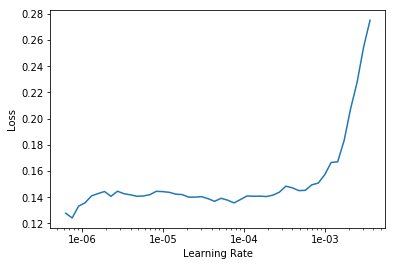

In [0]:
learn_res.recorder.plot()

In [0]:
learn_res.fit_one_cycle(4, slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.135620,0.491928,0.136163,0.863837,02:52
1,0.129710,0.512121,0.134394,0.865606,02:54
2,0.119244,0.510239,0.132626,0.867374,02:52
3,0.106387,0.502329,0.132626,0.867374,02:52


In [0]:
learn_res = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])
learn_res.load("/content/gdrive/My Drive/fastai-v3/cassava/train/models/res34-freeze_stg-2")

Learner(data=ImageDataBunch;

Train: LabelList (4525 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cmd,cmd,cmd,cmd
Path: /content/gdrive/My Drive/fastai-v3/cassava/train;

Valid: LabelList (1131 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cmd,cgm,cmd,cbsd,cmd
Path: /content/gdrive/My Drive/fastai-v3/cassava/train;

Test: LabelList (3774 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/fastai-v3/cassava/train, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=

In [0]:
data.test_ds.x

ImageList (3774 items)
Image (3, 500, 625),Image (3, 500, 666),Image (3, 666, 500),Image (3, 500, 666),Image (3, 500, 625)
Path: /content/gdrive/My Drive/fastai-v3/cassava/train

In [0]:

#Predict and Interprete
pred_res,y_res = learn_res.get_preds(ds_type= DatasetType.Test)
#interp_res = ClassificationInterpretation(learn_res, pred_res, y_res)

TypeError: ignored

In [0]:
preds_res = np.argmax(pred_res, axis =1)
preds_res

tensor([1, 3, 1,  ..., 3, 2, 3])

In [0]:
fnames = [f.name[:] for f in learn_res.data.test_ds.items]
index2labels = {0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}
tempd = pd.DataFrame({'cat':preds_res})
tempd['Category'] = tempd['cat'].map(index2labels)
tempd['Id'] = fnames
tempd.drop(['cat'], axis = 1, inplace = True)
tempd.head()
submission_2 = tempd.copy()
submission_2.to_csv('cassava_submission_2_res.csv', index = False)

In [0]:
!kaggle competitions submit -c cassava-disease -f cassava_submission_2_res.csv -m " Submitted Successfully"

100% 81.9k/81.9k [00:14<00:00, 5.83kB/s]
Successfully submitted to Cassava Disease Classification 

In [0]:
learn101 = cnn_learner(data, models.resnet101, metrics=[error_rate,accuracy])

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:02<00:00, 64896009.40it/s]


In [0]:
learn101.fit(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.854429,0.614599,0.221043,0.778957,14:50
1,0.648373,0.584903,0.206012,0.793988,02:49
2,0.574908,0.571698,0.209549,0.790451,02:44
3,0.527721,0.550597,0.186561,0.813439,02:46


In [0]:
learn101.save('learn-101-default', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/learn-101-default.pth')

In [0]:
learn101.unfreeze()

In [0]:
learn101.fit(2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.649451,0.625963,0.226348,0.773652,02:53
1,0.519323,0.823469,0.266136,0.733864,02:51


In [0]:
learn101 = cnn_learner(data, models.resnet101, metrics=[error_rate,accuracy])
learn101.load("/content/gdrive/My Drive/fastai-v3/cassava/train/models/learn-101-default");

In [0]:
learn101.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.503082,0.386420,0.133510,0.866490,02:41
1,0.490844,0.459781,0.147657,0.852343,02:39
2,0.461092,0.418277,0.134394,0.865606,02:40
3,0.420511,0.422512,0.129973,0.870027,02:36


In [0]:
learn101.save('learn-101-2', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/learn-101-2.pth')

In [0]:
learn101.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


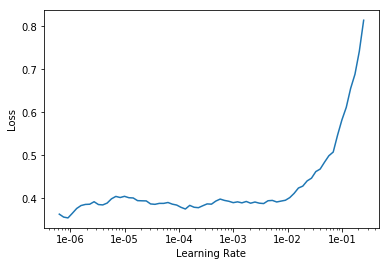

In [0]:
learn101.recorder.plot()

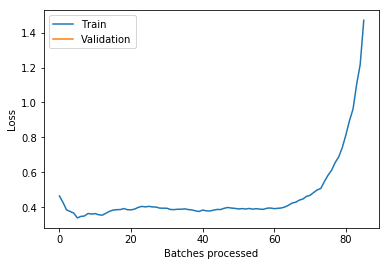

In [0]:
learn101.recorder.plot_losses()

In [0]:
lr = 1e-4

In [0]:
learn101.fit_one_cycle(2, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.386219,0.405228,0.129089,0.870911,02:37
1,0.406341,0.408668,0.130858,0.869142,02:37


In [0]:
learn101.save('learn-101-3_over_fit', True)

PosixPath('/content/gdrive/My Drive/fastai-v3/cassava/train/models/learn-101-3_over_fit.pth')

In [0]:
pred3,y_res3 = learn101.get_preds(ds_type= DatasetType.Test)
pred_red3 = np.argmax(pred3, axis = 1)

In [0]:
pred_red3[0:2]

tensor([1, 3])

In [0]:
fnames = [f.name[:] for f in learn101.data.test_ds.items]
index2labels = {0:'cbb', 1:'cbsd', 2:'cgm', 3:'cmd', 4:'healthy'}
tempd = pd.DataFrame({'cat':pred_red3})
tempd['Category'] = tempd['cat'].map(index2labels)
tempd['Id'] = fnames
tempd.drop(['cat'], axis = 1, inplace = True)
tempd.head()
submission_2 = tempd.copy()
submission_2.to_csv('cassava_submission_4_res.csv', index = False)

In [0]:
!kaggle competitions submit -c cassava-disease -f cassava_submission_4_res.csv -m " Submitted Successfully"

100% 81.8k/81.8k [00:02<00:00, 36.1kB/s]
Successfully submitted to Cassava Disease Classification 

In [0]:
tst = ImageDataBunch.from_folder(path=path/'train', train='.', valid_pct=.15,test = path/'test',
                                  ds_tfms= get_transforms(), size = 224).normalize(imagenet_stats)
                                                                                   
rs_preds, _rs = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
rs_preds.shape

In [0]:
t